# **NOTEBOOK COM O CÓDIGO UTILIZADO E COMENTÁRIOS PERTINENTES**

# **Configurando**
Realizando importações das bibliotecas utilizadas durante a análise exploratória 

In [5]:
#importação dos recursos do pandas
import pandas as pd

Lendo dataset de Games

In [ ]:
#Leitura do dataset de jogos e salvamento na variável df_games
df_games = pd.read_csv("../../data/games/raw/game_details.csv")

NameError: name 'pd' is not defined

In [ ]:
#Print das 5 primeiras e 5 ultimas ocorrêcias do dataset
print("Games Dataset:\n")
print(df_games.head())

Games Dataset:



NameError: name 'df_games' is not defined

In [114]:
df_games

,game_name,highest_price,release_date,genre,publisher,platform,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count
0,Grand Theft Auto IV,24.99,2012-02-15,Action / Shooter / Racing,Rockstar,PS3,98.0,86.0,8.3,5541.0,4.32,48904
1,Red Dead Redemption 2,59.99,2018-10-26,Action / Adventure / Unique,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379257
2,Red Dead Online,69.99,2018-10-29,Action / Adventure,Rockstar Games,PS4,97.0,99.0,8.9,31932.0,4.74,379346
3,Grand Theft Auto 3,9.99,2012-10-04,--,Rockstar Games,PS3,97.0,56.0,8.0,2079.0,4.59,1437
4,Grand Theft Auto V,69.99,2013-09-17,Action / Adventure,Rockstar Games,PS3,97.0,66.0,8.5,14322.0,4.65,40895
...,...,...,...,...,...,...,...,...,...,...,...,...
3521,SENRAN KAGURA Burst Re:Newal,39.99,2019-01-18,Action,Marvelous Europe Limited,PS4,65.0,19.0,5.6,65.0,4.69,2485
3522,Smash Hit Plunder,29.99,2018-10-05,Arcade / Unique / Family,TRIANGULAR PIXELS LTD,PS4,NaN,NaN,NaN,NaN,4.29,7
3523,FOX n FORESTS,19.99,2018-05-17,Action / Role playing games / Adventure,ASTRAGON ENTERTAINMENT GMBH,PS4,NaN,NaN,NaN,NaN,4.22,50
3524,DYNASTY WARRIORS 9,69.99,2018-03-13,Action,Koei Tecmo Europe Ltd,PS4,NaN,NaN,NaN,NaN,3.49,12177


# **Explorando Features do Dataset**

Vendo os tipos de cada feature

In [ ]:
#salvando df_games em uma nova variável e verificando o tipo de cada dado
Dataset = df_games
print(Dataset.dtypes)

game_name                               object
highest_price                          float64
release_date                    datetime64[ns]
genre                                 category
publisher                             category
platform                              category
metacritic_score                       float64
metacritic_rating_count                float64
metacritic_user_score                  float64
metacritic_user_rating_count           float64
playstation_score                       object
playstation_rating_count                 Int64
dtype: object


# 1° Etapa: *Tratamento dos dados para salvar como dataset PROCESSADO*

In [ ]:
#Verificando quantos valores nulos temos em cada tabela.
df_games.isnull().sum()

game_name                          0
highest_price                    111
release_date                       0
genre                              0
publisher                         55
platform                           0
metacritic_score                2647
metacritic_rating_count         2647
metacritic_user_score           2646
metacritic_user_rating_count    2646
playstation_score                  0
playstation_rating_count         969
dtype: int64

Alterando os tipos de alguns dados, para condizerem melhor com o que são

In [88]:
df_games['release_date'] = df_games['release_date'].astype('datetime64[ns]')

In [89]:
df_games[['genre', 'publisher', 'platform']] = df_games[['genre', 'publisher', 'platform']].astype('category')

In [90]:
df_games['playstation_rating_count'] = df_games['playstation_rating_count'].astype('Int64')

In [91]:
df_games["highest_price"] = df_games["highest_price"].str.replace("€", "", regex=False)

In [ ]:
#Alterando esses valores para poder converter para float
df_games['highest_price'] = df_games['highest_price'].str.replace("FREE", "0")

In [94]:
df_games['highest_price'] = df_games['highest_price'].astype('float')

Analisando o que tem em cada coluna

In [113]:
for col in Dataset.columns:
    print(f"\nColuna: {col}")
    print(Dataset[col].unique())



Coluna: game_name
['Grand Theft Auto IV' 'Red Dead Redemption 2' 'Red Dead Online' ...
 'FOX n FORESTS' 'DYNASTY WARRIORS 9' 'Vostok Inc.']

Coluna: highest_price
[2.499e+01 5.999e+01 6.999e+01 9.990e+00       nan 1.499e+01 4.999e+01
 1.999e+01 2.999e+01 1.799e+01 3.999e+01 7.999e+01 5.990e+00 4.990e+00
 7.990e+00 1.299e+01 5.499e+01 8.990e+00 1.399e+01 1.990e+00 1.899e+01
 1.249e+01 2.199e+01 2.399e+01 1.449e+01 1.199e+01 3.499e+01 2.990e+00
 1.000e+02 3.699e+01 1.000e+04 7.499e+01 0.000e+00 6.990e+00 2.699e+01
 4.499e+01 3.990e+00 1.699e+01 2.899e+01 1.125e+01 2.849e+01 1.599e+01
 1.099e+01 1.329e+01 2.099e+01 9.999e+01 5.490e+00 3.299e+01 3.899e+01
 7.490e+00 6.499e+01 2.490e+00 6.190e+00 3.599e+01 4.490e+00 7.000e+01
 3.590e+00 1.349e+01 6.490e+00 3.199e+01 3.799e+01 6.590e+00 1.490e+00]

Coluna: release_date
<DatetimeArray>
['2012-02-15 00:00:00', '2018-10-26 00:00:00', '2018-10-29 00:00:00',
 '2012-10-04 00:00:00', '2013-09-17 00:00:00', '2014-11-18 00:00:00',
 '2023-09-06 00:00

*Subdividir* as features categoricas definidas anteriormente 'genre', 'publisher' e 'platform' em várias features binarias atráves do One Hoting Encode

In [ ]:
#One hot encoding utilizado sobre a coluna de plataformas, afim de obter melhor visualização
Dataset_actual = pd.get_dummies(df_games, columns=["platform"], prefix="platform", drop_first=True)


In [163]:
Dataset_actual

,game_name,highest_price,release_date,genre,publisher,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,...,platform_PS3 / PSP,platform_PS4,platform_PS4 / PS Vita,platform_PS4 / PS3,platform_PS4 / PS3 / PS Vita,platform_PS5,platform_PS5 / PS4,platform_PS5 / PS4 / PS Vita,platform_PS5 / PS4 / PS3 / PS Vita,platform_PSP
0,Grand Theft Auto IV,24.99,2012-02-15,Action / Shooter / Racing,Rockstar,98.0,86.0,8.3,5541.0,4.32,...,False,False,False,False,False,False,False,False,False,False
1,Red Dead Redemption 2,59.99,2018-10-26,Action / Adventure / Unique,Rockstar Games,97.0,99.0,8.9,31932.0,4.74,...,False,True,False,False,False,False,False,False,False,False
2,Red Dead Online,69.99,2018-10-29,Action / Adventure,Rockstar Games,97.0,99.0,8.9,31932.0,4.74,...,False,True,False,False,False,False,False,False,False,False
3,Grand Theft Auto 3,9.99,2012-10-04,--,Rockstar Games,97.0,56.0,8.0,2079.0,4.59,...,False,False,False,False,False,False,False,False,False,False
4,Grand Theft Auto V,69.99,2013-09-17,Action / Adventure,Rockstar Games,97.0,66.0,8.5,14322.0,4.65,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3521,SENRAN KAGURA Burst Re:Newal,39.99,2019-01-18,Action,Marvelous Europe Limited,65.0,19.0,5.6,65.0,4.69,...,False,True,False,False,False,False,False,False,False,False
3522,Smash Hit Plunder,29.99,2018-10-05,Arcade / Unique / Family,TRIANGULAR PIXELS LTD,NaN,NaN,NaN,NaN,4.29,...,False,True,False,False,False,False,False,False,False,False
3523,FOX n FORESTS,19.99,2018-05-17,Action / Role playing games / Adventure,ASTRAGON ENTERTAINMENT GMBH,NaN,NaN,NaN,NaN,4.22,...,False,True,False,False,False,False,False,False,False,False
3524,DYNASTY WARRIORS 9,69.99,2018-03-13,Action,Koei Tecmo Europe Ltd,NaN,NaN,NaN,NaN,3.49,...,False,True,False,False,False,False,False,False,False,False


Listagem atual de valores nulos

In [ ]:
#Valores faltantes após o one-hot encoding
Dataset_actual.isna().sum().sort_values(ascending=False)

metacritic_rating_count               2647
metacritic_score                      2647
metacritic_user_rating_count          2646
metacritic_user_score                 2646
playstation_rating_count               969
highest_price                          111
publisher                               55
genre                                    0
game_name                                0
release_date                             0
playstation_score                        0
platform_PS Vita / PSP                   0
platform_PS3                             0
platform_PS3 / PS Vita                   0
platform_PS3 / PS Vita / PSP             0
platform_PS3 / PSP                       0
platform_PS4                             0
platform_PS4 / PS Vita                   0
platform_PS4 / PS3                       0
platform_PS4 / PS3 / PS Vita             0
platform_PS5                             0
platform_PS5 / PS4                       0
platform_PS5 / PS4 / PS Vita             0
platform_PS

In [ ]:
#Localizando o nome dos jogos em que o preço mais alto é nulo
Dataset_actual.loc[Dataset_actual["highest_price"].isna(), "game_name"].tolist()

['Uncharted 2: Among Thieves™',
 'The Elder Scrolls V: Skyrim',
 'The Last of Us™',
 'Portal 2',
 'Street Fighter IV',
 'Rayman® Legends',
 'ROCK BAND',
 'BATMAN: ARKHAM ASYLUM',
 'God of War® III',
 'ROCK BAND 2',
 'ROCK BAND 3',
 'NBA 2K12',
 'Grandia',
 "Uncharted: Drake's Fortune™",
 'BioShock 2',
 'THE BEATLES: ROCK BAND',
 'Need for Speed Hot Pursuit',
 'Diablo® IV',
 'Valkyria Chronicles™',
 'Guitar Hero® 5',
 'Brothers: a Tale of two Sons',
 'Red Faction: Guerrilla',
 "Marvel's Spider-Man: Miles Morales PS4 & PS5",
 "Marvel's Spider-Man: Miles Morales PS4 & PS5",
 "Sid Meier's Civilization Revolution",
 'SOULCALIBUR IV',
 'Super Street Fighter IV',
 'Outland™ Full Game Unlock',
 'Motorstorm',
 'Warhawk™',
 'Call of Duty : World at War',
 'Skate 2',
 'Devil May Cry™ 4',
 'F1 2011™',
 'Need for Speed™ Shift',
 'Unreal Tournament 3',
 'The Chronicles of Riddick: Assault on Dark Athena',
 'MotorStorm Pacific Rift',
 'Brütal Legend',
 'Blur',
 'Tales of Monkey Island Chapter 5: Rise

Utilizar NaN para a coluna highest_price com os valores nulos

In [ ]:
import numpy as np
#conversão novamente para ponto flutuante após algum erro que não consegui identificar
Dataset_actual["highest_price"] = pd.to_numeric(Dataset_actual["highest_price"], errors="coerce").astype("float64")

In [167]:
Dataset_actual["highest_price"].isna().sum()

np.int64(111)

In [ ]:
#Após muita luta foi conseguido converter esses valores pra NaN. Havia alguns que sequer existiam
Dataset_actual[Dataset_actual["highest_price"].isna()][["game_name","highest_price"]]

,game_name,highest_price
8,Uncharted 2: Among Thieves™,NaN
11,The Elder Scrolls V: Skyrim,NaN
14,The Last of Us™,NaN
16,Portal 2,NaN
43,Street Fighter IV,NaN
...,...,...
3307,Agarest: Generations of War,NaN
3318,Sniper Elite V2,NaN
3427,Wheelman,NaN
3428,TRIVIAL PURSUIT,NaN


# **Resolvendo mais valores faltantes ou colocados com tags indevidas, como --**

In [ ]:
#Conversão para numérico dos valores de avaliação dos jogos playstation
Dataset_actual['playstation_score'] = pd.to_numeric(Dataset_actual['playstation_score'], errors='coerce')

In [174]:
print(f"Novo tipo da coluna: {Dataset_actual['playstation_score'].dtype}")
print(f"Valores nulos (NaN) na coluna agora: {Dataset_actual['playstation_score'].isna().sum()}")

Novo tipo da coluna: float64
Valores nulos (NaN) na coluna agora: 969


In [ ]:
#Conversão onde antes não havia valor nulo em gênero por conta de caracteres como --. Todos foram colocados para nulo
Dataset_actual['genre'] = Dataset_actual['genre'].replace('--', np.nan)

C:\Users\gusta\AppData\Local\Temp\ipykernel_7760\2795830590.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  Dataset_actual['genre'] = Dataset_actual['genre'].replace('--', np.nan)


In [219]:
print("\n--- Contagem total de nulos (atualizada) ---")
print(Dataset_actual.isna().sum().sort_values(ascending=False))


--- Contagem total de nulos (atualizada) ---
metacritic_rating_count               2647
metacritic_score                      2647
metacritic_user_rating_count          2646
metacritic_user_score                 2646
playstation_score                      969
playstation_rating_count               969
genre                                  519
highest_price                          111
publisher                               55
release_date                             0
game_name                                0
platform_PS Vita / PSP                   0
platform_PS3                             0
platform_PS3 / PS Vita                   0
platform_PS3 / PS Vita / PSP             0
platform_PS3 / PSP                       0
platform_PS4                             0
platform_PS4 / PS Vita                   0
platform_PS4 / PS3                       0
platform_PS4 / PS3 / PS Vita             0
platform_PS5                             0
platform_PS5 / PS4                       0
platform

In [ ]:
#Salvamento do dataset tratado e funcional
path_salvar_csv = '../../data/games/processed/games_tratado.csv'

Dataset_actual.to_csv(path_salvar_csv, index=False)

print(f"Arquivo salvo com sucesso em: {path_salvar_csv}")

# df_carregado = pd.read_csv(path_salvar_csv)

Arquivo salvo com sucesso em: ../data/processed/games_tratado.csv


In [ ]:
#Print dos novos tipos do dataset
print(Dataset_actual.dtypes)

game_name                                     object
highest_price                                float64
release_date                          datetime64[ns]
genre                                       category
publisher                                   category
metacritic_score                             float64
metacritic_rating_count                      float64
metacritic_user_score                        float64
metacritic_user_rating_count                 float64
playstation_score                            float64
playstation_rating_count                       Int64
platform_PS Vita / PSP                          bool
platform_PS3                                    bool
platform_PS3 / PS Vita                          bool
platform_PS3 / PS Vita / PSP                    bool
platform_PS3 / PSP                              bool
platform_PS4                                    bool
platform_PS4 / PS Vita                          bool
platform_PS4 / PS3                            

In [ ]:
#Variável onde irá ser feito todas as operações a partir de agora.
Dataset_de_agora = pd.read_csv("../../data/games/processed/games_tratado.csv")

Análise sobre datas de lançamento

In [ ]:
#Análise de jogos lançados em 1970, que após identificados no dataset tratado, foram atualizados com as datas corretas, à base do braço
mask = Dataset_de_agora["release_date"].between("1970-01-01", "1990-12-31")
games_70s = Dataset_de_agora.loc[mask, ["game_name", "release_date"]]

# visualizar
print(games_70s)

Empty DataFrame
Columns: [game_name, release_date]
Index: []


In [228]:
Dataset_de_agora["highest_price"] = Dataset_de_agora["highest_price"].replace("", np.nan)

In [ ]:
#Salvamento novo sobre os valores tratados, assim espero, por favor!
path_salvar_csv = "../../data/games/processed/games_tratado.csv"

Dataset_de_agora.to_csv(path_salvar_csv, index=False)

print(f"Arquivo salvo com sucesso em: {path_salvar_csv}")

# Para carregar este arquivo de volta no futuro:
# df_carregado = pd.read_csv(path_salvar_csv)

Arquivo salvo com sucesso em: ../data/processed/games_tratado.csv


# **2° Etapa - Análise Exploratória dos Dados**

In [239]:
Dataset_de_agora.describe()

,highest_price,metacritic_score,metacritic_rating_count,metacritic_user_score,metacritic_user_rating_count,playstation_score,playstation_rating_count
count,3415.000000,879.000000,879.000000,880.000000,880.000000,2556.00000,2556.000000
mean,60.822243,77.470990,33.407281,6.650455,1053.763636,4.35779,7398.339593
std,565.384178,9.003607,28.617623,2.399957,6258.632676,0.41538,30807.688680
min,0.000000,65.000000,4.000000,0.000000,0.000000,1.00000,1.000000
25%,14.990000,69.000000,10.000000,6.400000,17.000000,4.14000,74.000000
50%,21.990000,76.000000,24.000000,7.400000,76.000000,4.42000,527.000000
75%,39.990000,85.000000,50.000000,8.100000,370.750000,4.64000,3101.500000
max,10000.000000,98.000000,145.000000,9.500000,165959.000000,5.00000,854788.000000


In [7]:
print("\n--- Contagem total de nulos (atualizada) ---")
print(Dataset_de_agora.isna().sum().sort_values(ascending=False))


--- Contagem total de nulos (atualizada) ---
metacritic_rating_count               2644
metacritic_score                      2644
metacritic_user_rating_count          2643
metacritic_user_score                 2643
playstation_score                      967
playstation_rating_count               967
genre                                  519
highest_price                          108
publisher                               55
release_date                             0
game_name                                0
platform_PS Vita / PSP                   0
platform_PS3                             0
platform_PS3 / PS Vita                   0
platform_PS3 / PS Vita / PSP             0
platform_PS3 / PSP                       0
platform_PS4                             0
platform_PS4 / PS Vita                   0
platform_PS4 / PS3                       0
platform_PS4 / PS3 / PS Vita             0
platform_PS5                             0
platform_PS5 / PS4                       0
platform

In [8]:
Dataset_de_agora.loc[Dataset_de_agora["playstation_score"].isna(), "game_name"].tolist()


["Baldur's Gate 3",
 'ELDEN RING PS4 & PS5',
 'The Elder Scrolls V: Skyrim',
 'Persona 5 Royal',
 'Portal 2',
 'Metaphor: ReFantazio PS4 et PS5',
 'ASTRO BOT',
 'Quake',
 'Clair Obscur: Expedition 33',
 'Resident Evil 4 PS4 & PS5',
 'Hades',
 'Street Fighter IV',
 'Blue Prince',
 'Forza Horizon 5 Standard Edition',
 'Demon’s Souls',
 'Rayman® Legends',
 'ROCK BAND',
 'BATMAN: ARKHAM ASYLUM',
 'God of War® III',
 'I Was a Teenage Exocolonist',
 'ROCK BAND 2',
 'ROCK BAND 3',
 'Shujinkou',
 'ANIMAL WELL',
 'TEKKEN 8',
 'Marvel’s Spider-Man 2',
 'Walkabout Mini Golf',
 'Chicory: A Colorful Tale',
 'NBA 2K12',
 'DEATH STRANDING 2: ON THE BEACH',
 "Thank Goodness You're Here!",
 'TimeMelters',
 'Grandia',
 'Horizon Forbidden West™ Complete Edition',
 'Like a Dragon: Infinite Wealth PS4 & PS5',
 'Gravity Circuit',
 'Rez Infinite',
 'Neon White',
 'NORCO',
 'Atari 50: The Anniversary Celebration',
 'Dead Space',
 'The Last of Us™ Part I',
 'Disco Elysium - The Final Cut',
 'Sword of the Sea',

Estatísticas descritivas

In [ ]:
#Principais estatísticas descritivas sobre o datasset em valores numéricos e categóricos
print("--- Estatísticas Descritivas (Numéricas) ---")
print(Dataset_de_agora.describe().T)

print("\n" + "="*50 + "\n")

print("--- Estatísticas Descritivas (Categóricas) ---")
print(Dataset_actual.describe(include=['category', 'object']))

--- Estatísticas Descritivas (Numéricas) ---
                               count         mean           std   min    25%  \
highest_price                 3415.0    60.822243    565.384178   0.0  14.99   
metacritic_score               879.0    77.470990      9.003607  65.0  69.00   
metacritic_rating_count        879.0    33.407281     28.617623   4.0  10.00   
metacritic_user_score          880.0     6.650455      2.399957   0.0   6.40   
metacritic_user_rating_count   880.0  1053.763636   6258.632676   0.0  17.00   
playstation_score             2556.0     4.357790      0.415380   1.0   4.14   
playstation_rating_count      2556.0  7398.339593  30807.688680   1.0  74.00   

                                 50%      75%       max  
highest_price                  21.99    39.99   10000.0  
metacritic_score               76.00    85.00      98.0  
metacritic_rating_count        24.00    50.00     145.0  
metacritic_user_score           7.40     8.10       9.5  
metacritic_user_rating_c

In [281]:
print(Dataset_de_agora.dtypes)

game_name                                     object
highest_price                                float64
release_date                          datetime64[ns]
genre                                       category
publisher                                   category
metacritic_score                             float64
metacritic_rating_count                      float64
metacritic_user_score                        float64
metacritic_user_rating_count                 float64
playstation_score                            float64
playstation_rating_count                       Int64
platform_PS Vita / PSP                          bool
platform_PS3                                    bool
platform_PS3 / PS Vita                          bool
platform_PS3 / PS Vita / PSP                    bool
platform_PS3 / PSP                              bool
platform_PS4                                    bool
platform_PS4 / PS Vita                          bool
platform_PS4 / PS3                            

CONVERSÃO DE ALGUNS VALORES QUE NÃO FORAM ACOMPANHADOS DURANTE O SALVAMENTO DO NOVO DATASET

In [255]:
Dataset_de_agora['release_date'] = Dataset_de_agora['release_date'].astype('datetime64[ns]')

In [259]:
Dataset_de_agora[['genre', 'publisher']] = Dataset_de_agora[['genre', 'publisher']].astype('category')

In [261]:
Dataset_de_agora['playstation_rating_count'] = Dataset_de_agora['playstation_rating_count'].astype('Int64')

In [ ]:
#aGORA SIM OS LANÇAMENTOS ESTÃO CORRETOS, BASEADO NA DATA DE LANÇAMENTO DO PS3, QUE É 2006
data_minima = Dataset_de_agora['release_date'].min()
data_maxima = Dataset_de_agora['release_date'].max()
print(f"Período dos dados (data de lançamento): de {data_minima.strftime('%d/%m/%Y')} até {data_maxima.strftime('%d/%m/%Y')}")

Período dos dados (data de lançamento): de 11/11/2006 até 12/09/2025


In [ ]:
#Top 10 publishers e quantidade de jogos publicados
top_10_publishers = Dataset_de_agora['publisher'].value_counts().head(10)
print(top_10_publishers)

publisher
Sony Interactive Entertainment Europe    209
SEGA EUROPE LTD                          100
EA Swiss Sarl                             93
Square Enix LTD                           90
UBISOFT ENTERTAINMENT SA                  90
NIS America                               87
CE EUROPE LIMITED                         86
BANDAI NAMCO ENTERTAINMENT EUROPE         81
Koei Tecmo Europe Ltd                     73
WARNER BROS. INTERACTIVE                  49
Name: count, dtype: int64


# **3° Etapa - Geração de Gráficos para visualização**

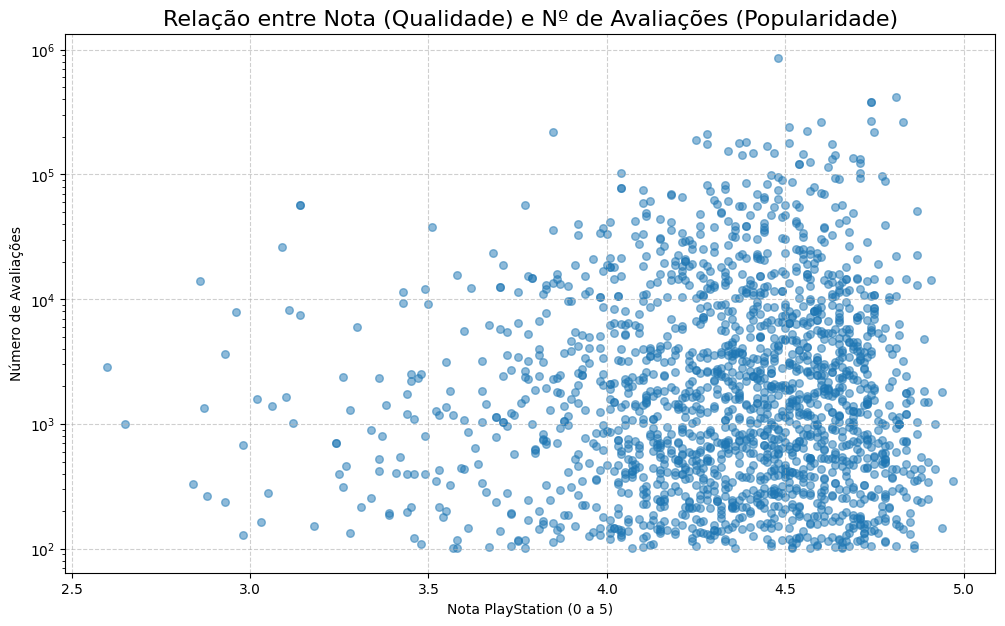

In [ ]:
#Importação das bibliotecas para o plot dos gráficos
import matplotlib.pyplot as plt
import seaborn as sns

#Filtro sobre a contagem de avaliações a partir de 101 avaliações
df_filtrado = Dataset_de_agora[Dataset_de_agora['playstation_rating_count'] > 100]

#Tamanho da figura
plt.figure(figsize=(12, 7))
plt.scatter(
    df_filtrado['playstation_score'], 
    df_filtrado['playstation_rating_count'], 
    alpha=0.5,  
    s=30        
)

#Informações de preenchimento do gráfico
plt.title('Relação entre Nota (Qualidade) e Nº de Avaliações (Popularidade)', fontsize=16)
plt.xlabel('Nota PlayStation (0 a 5)')
plt.ylabel('Número de Avaliações')
plt.yscale('log') 

plt.grid(True, linestyle='--', alpha=0.6)

#Salvar e exibir
plt.savefig('../../docs/figures/games/grafico_dispersao_popularidade_nota.png')
plt.show()

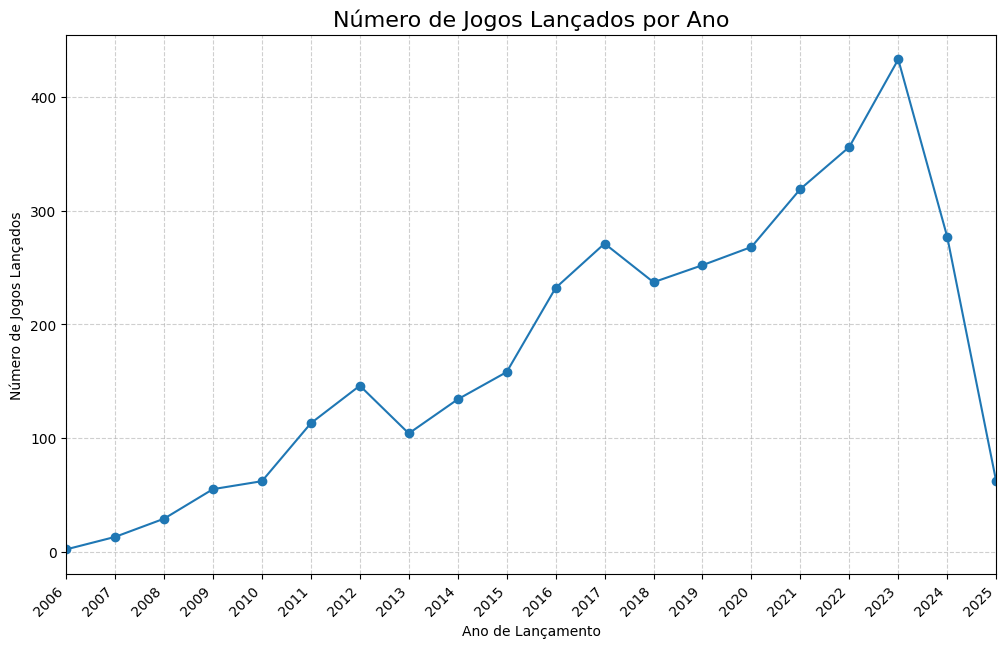

In [ ]:

ano_lancamento = Dataset_de_agora['release_date'].dt.year

#Contagem da quantidade de jogos lançados a partir de sua data de lançamento, pegando somente o ano
jogos_por_ano = ano_lancamento.value_counts().sort_index()

#Configuração de exibição do gráfico
plt.figure(figsize=(12, 7))
jogos_por_ano.plot(kind='line', marker='o')


plt.xticks(
    ticks=jogos_por_ano.index, 
    rotation=45,               
    ha='right'
)

#Informações de preenchimento do gráfico
plt.title('Número de Jogos Lançados por Ano', fontsize=16)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Jogos Lançados')
plt.grid(True, linestyle='--', alpha=0.6)


plt.xlim(jogos_por_ano.index.min(), jogos_por_ano.index.max())

#Salvar e exibir
plt.savefig('../../docs/figures/games/grafico_linha_temporal_lancamentos.png', bbox_inches='tight')
plt.show()

C:\Users\gusta\AppData\Local\Temp\ipykernel_7760\272456806.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


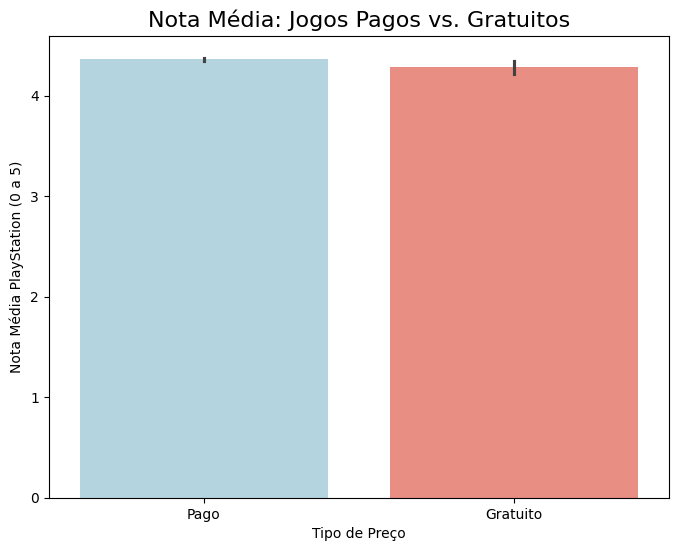

In [ ]:
#Função para dividir as regras entre jogos pagos e gratuitos
def categoriza_preco(preco):
    if preco > 0:
        return 'Pago'
    elif preco == 0:
        return 'Gratuito'
    return 'N/A' 

Dataset_de_agora['tipo_preco'] = Dataset_de_agora['highest_price'].apply(categoriza_preco)

df_preco = Dataset_de_agora[Dataset_de_agora['tipo_preco'].isin(['Pago', 'Gratuito'])]

#Informações de preenchimento do gráfico
plt.figure(figsize=(8, 6))
sns.barplot(
    x='tipo_preco', 
    y='playstation_score', 
    data=df_preco,
    palette=['lightblue', 'salmon'] 
)

plt.title('Nota Média: Jogos Pagos vs. Gratuitos', fontsize=16)
plt.xlabel('Tipo de Preço')
plt.ylabel('Nota Média PlayStation (0 a 5)')

#Salvar e exibir
plt.savefig('../../docs/figures/games/grafico_barras_preco_nota.png')
plt.show()

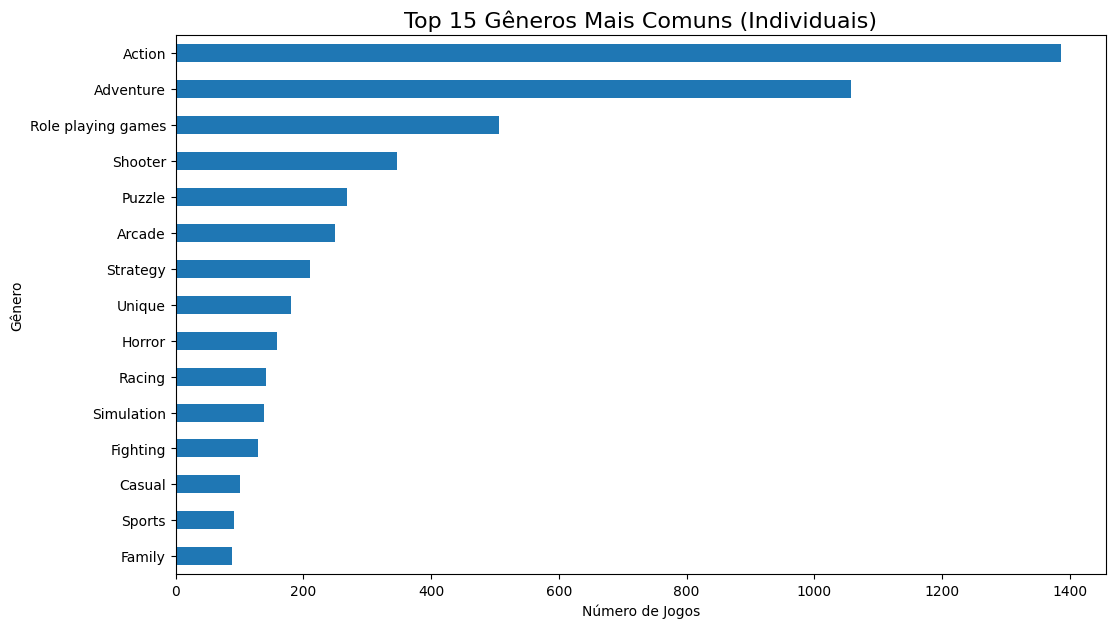

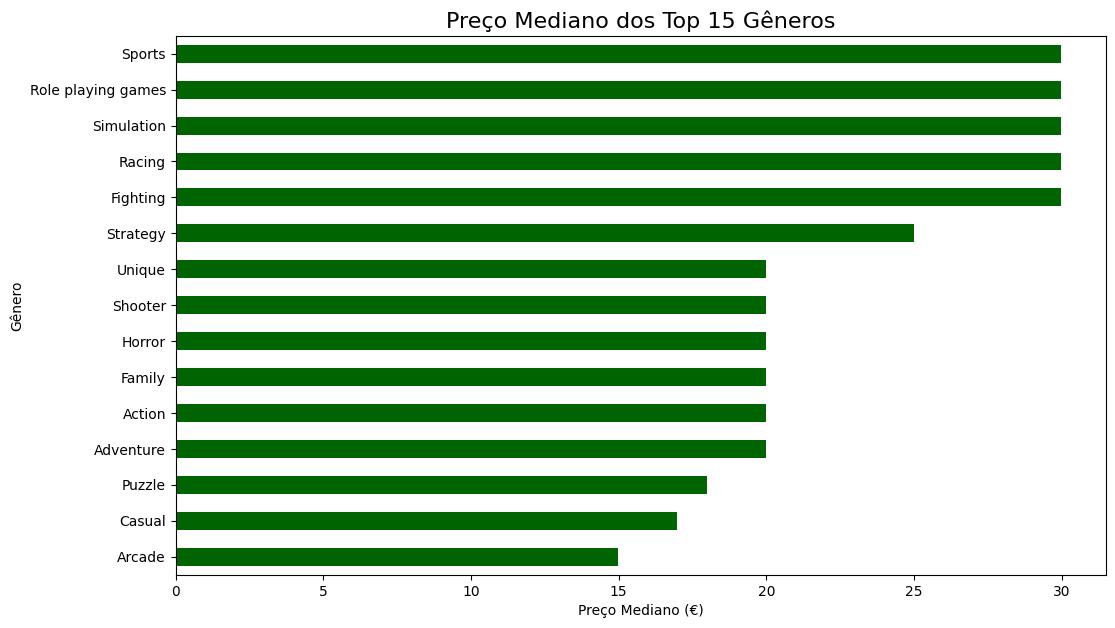

In [ ]:
#Remoção dos valores nulos de gênero
df_generos = Dataset_de_agora.dropna(subset=['genre']) 
df_generos_split = df_generos.assign(genre=df_generos['genre'].str.split(' / ')).explode('genre')
df_generos_split['genre'] = df_generos_split['genre'].str.strip() 

#Separa pelos 15 gêneros mais visualizados
top_15_generos = df_generos_split['genre'].value_counts().head(15)

#Informações de preenchimento do gráfico
plt.figure(figsize=(12, 7))
top_15_generos.sort_values().plot(kind='barh')
plt.title('Top 15 Gêneros Mais Comuns (Individuais)', fontsize=16)
plt.xlabel('Número de Jogos')
plt.ylabel('Gênero')
#Salvar e exibir
plt.savefig('../../docs/figures/games/grafico_barras_contagem_genero.png', bbox_inches='tight')
plt.show()


#Configuração da exibição dos valores que serão mostrados no gráfico
df_top_15_preco = df_generos_split[df_generos_split['genre'].isin(top_15_generos.index)]
preco_mediano_genero = df_top_15_preco.groupby('genre')['highest_price'].median().sort_values()

#Informações de preenchimento do gráfico
plt.figure(figsize=(12, 7))
preco_mediano_genero.plot(kind='barh', color='darkgreen')
plt.title('Preço Mediano dos Top 15 Gêneros', fontsize=16)
plt.xlabel('Preço Mediano (€)')
plt.ylabel('Gênero')
#Salvar e exibir
plt.savefig('../../docs/figures/games/grafico_barras_preco_genero.png', bbox_inches='tight')
plt.show()

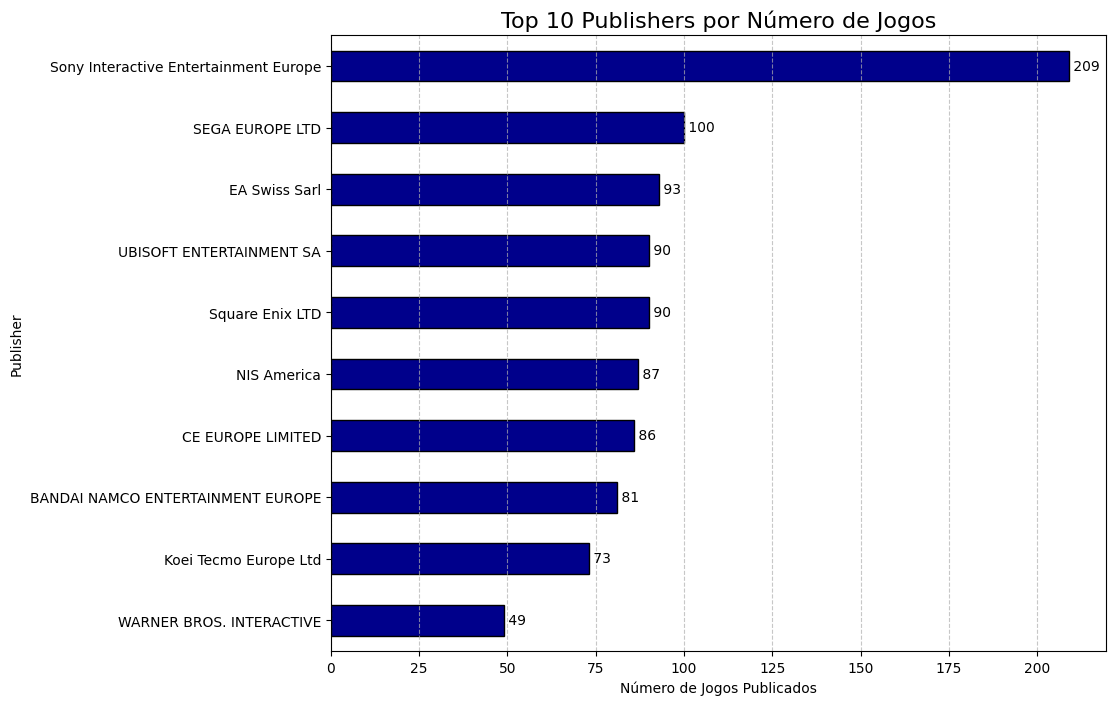

In [ ]:
#Separação das 10 publishers que mais publicaram
top_10_publishers = Dataset_de_agora['publisher'].value_counts().head(10)

plt.figure(figsize=(10, 8))

bars = top_10_publishers.sort_values(ascending=True).plot(
    kind='barh', 
    color='darkblue', 
    edgecolor='black'
)
#Informações de preenchimento do gráfico
plt.title('Top 10 Publishers por Número de Jogos', fontsize=16)
plt.xlabel('Número de Jogos Publicados')
plt.ylabel('Publisher')
plt.grid(axis='x', linestyle='--', alpha=0.7)

#Exibição enumerada das 10 publishers
for index, value in enumerate(top_10_publishers.sort_values(ascending=True)):
    plt.text(value, index, f' {value}', va='center')

##Salvar e exibir
plt.savefig('../../docs/figures/games/grafico_top_10_publishers_contagem.png', bbox_inches='tight')
plt.show()

C:\Users\gusta\AppData\Local\Temp\ipykernel_16480\1604945079.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


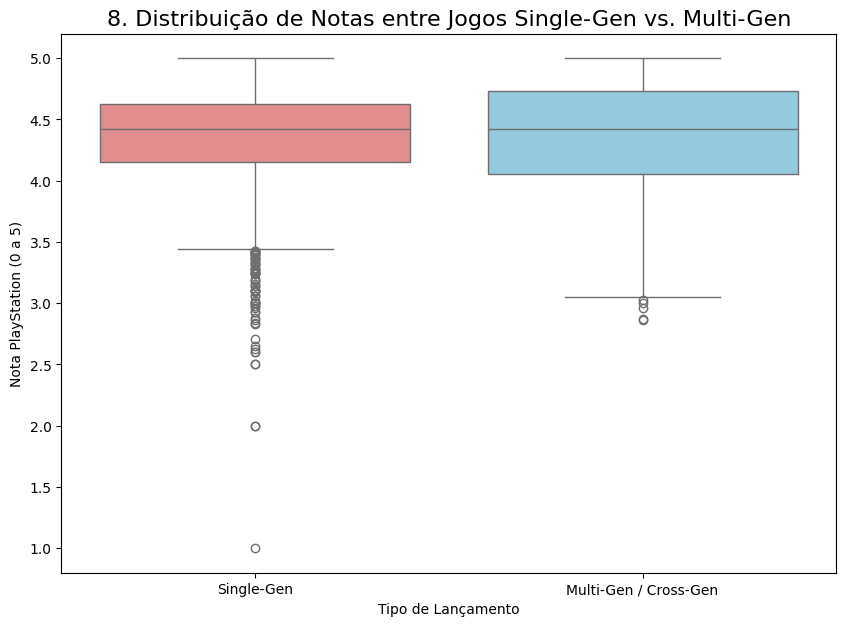

In [ ]:
# seleciona colunas de plataforma que indicam cross-gen (contêm '/')
cross_gen_cols = [
    col for col in Dataset_de_agora.columns 
    if col.startswith('platform_') and '/' in col
]

# cria flag booleana indicando se o jogo é multi-gen
Dataset_de_agora['is_multigen'] = Dataset_de_agora[cross_gen_cols].any(axis=1)

# mapeia a flag para rótulos mais legíveis
Dataset_de_agora['gen_type'] = Dataset_de_agora['is_multigen'].map({
    True: 'Multi-Gen / Cross-Gen', 
    False: 'Single-Gen'
})

# remove linhas sem nota ou sem tipo de geração
df_gen_type = Dataset_de_agora.dropna(subset=['playstation_score', 'gen_type'])

# configura o gráfico de boxplot
plt.figure(figsize=(10, 7))
sns.boxplot(
    x='gen_type',
    y='playstation_score',
    data=df_gen_type,
    palette=['lightcoral', 'skyblue']
)

# título e rótulos dos eixos
plt.title('8. Distribuição de Notas entre Jogos Single-Gen vs. Multi-Gen', fontsize=16)
plt.xlabel('Tipo de Lançamento')
plt.ylabel('Nota PlayStation (0 a 5)')

#Salvar e exibir
plt.savefig('../../docs/figures/games/grafico_boxplot_multi_gen_corrigido.png', bbox_inches='tight')
plt.show()


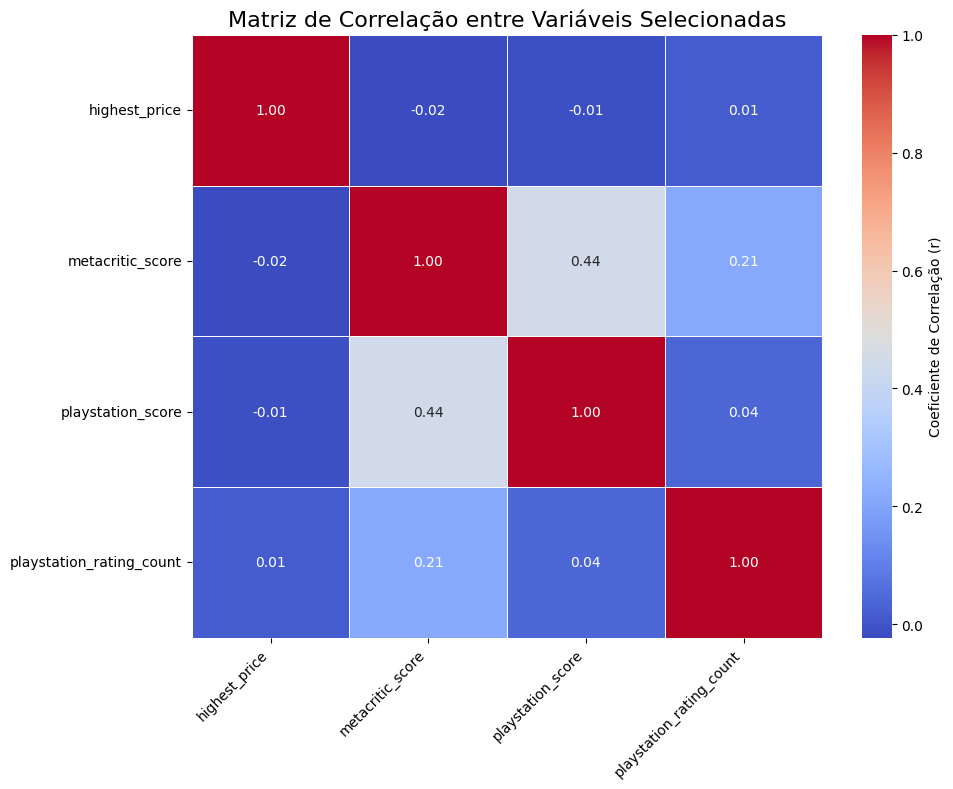

In [ ]:
#Colunas analisadas na correlaçaõ
colunas_correlacao_vis = [
    'highest_price', 
    'metacritic_score', 
    'playstation_score',
    'playstation_rating_count' 
]


corr = Dataset_actual[colunas_correlacao_vis].corr()

#Informações de preenchimento do gráfico
plt.figure(figsize=(10, 8)) 
sns.heatmap(
    corr, 
    annot=True,
    cmap='coolwarm', 
    fmt=".2f",
    linewidths=.5, 
    cbar_kws={'label': 'Coeficiente de Correlação (r)'} 
)

plt.title('Matriz de Correlação entre Variáveis Selecionadas', fontsize=16)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
#Salvar e exibir
plt.savefig('../../docs/figures/games/grafico_heatmap_selecionado_melhorado.png')
plt.show()

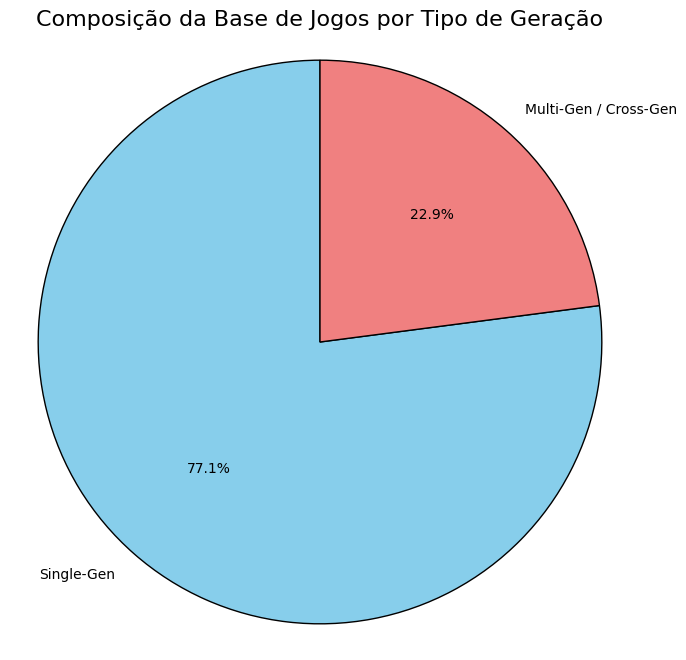

In [ ]:
contagem_gen_type = Dataset_de_agora['gen_type'].value_counts()


plt.figure(figsize=(8, 8))
plt.pie(
    contagem_gen_type, 
    labels=contagem_gen_type.index, 
    autopct='%1.1f%%',      
    startangle=90,            
    colors=['skyblue', 'lightcoral'],
    wedgeprops={'edgecolor': 'black'}
)


plt.title('Composição da Base de Jogos por Tipo de Geração', fontsize=16)


plt.axis('equal') 


plt.savefig('../../docs/figures/games/grafico_pizza_gen_type.png', bbox_inches='tight')
plt.show()